In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Importar arquivo temporário via biblioteca do google colab
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [3]:
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
#por padrão, trás as primeiras 5 linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Retorna a quantidade de linhas e colunas do dataframe
df.shape

(904, 16)

In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#Receita total
df["Valor Venda"].sum()

5984606.1426

In [8]:
#Custo total
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])
df.sample(3)
#df.shape

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
517,2009-03-19,2009-03-31,307,366,19118,200903193CS708,348.58,758.0,10,1516.0,6064.0,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,3485.80
802,2008-08-27,2008-09-05,199,384,18865,200808273CS678,348.58,758.0,6,454.8,4093.2,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
222,2008-06-27,2008-07-10,199,384,18849,200806273CS625,348.58,758.0,18,0.0,13644.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,6274.44


In [9]:
#Custo Total
round(df["Custo"].sum(), 2)

2486783.05

In [10]:
#Coluna Lucro 
df["Lucro"] = round(df["Valor Venda"] - df["Custo"], 2)
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
302,2008-03-07,2008-03-15,199,384,18824,200803073CS579,348.58,758.00,2,75.800,1440.200,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,697.16,743.04
735,2009-12-17,2009-12-29,306,2496,19078,200912175CS780,5.09,9.99,192,383.616,1534.464,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,977.28,557.18
81,2009-07-06,2009-07-10,306,1203,19070,200907064CS757,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,3931.86


In [11]:
#Lucro total
round(df["Lucro"].sum(), 2)
#df.head(1)

3497823.0

In [12]:
#Coluna de tempo de envio
df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [13]:
#Capturando apenas os dias
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.loc[1:3]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6


In [14]:
df["Tempo Envio"].dtype

dtype('int64')

In [15]:
#Media do tempo de envio por marca
round(df.groupby("Marca")["Tempo Envio"].mean(), 2)

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: Tempo Envio, dtype: float64

In [16]:
#Verificar valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [21]:
#Agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,415.92
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.94
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [20]:
#Formatar flutuantes
pd.options.display.float_format = '{:20,.2f}'.format

In [24]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,415.92"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.94"
5,2009,Fabrikam,"1,034,091.35"


In [26]:
# total de produtos vendidos
aux1 = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
aux1

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

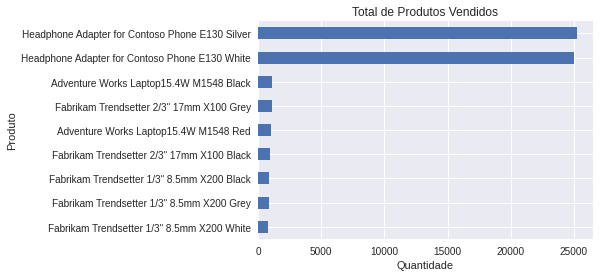

In [34]:
#Grafico de barras horizontais
aux1.sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Quantidade")
plt.ylabel("Produto");

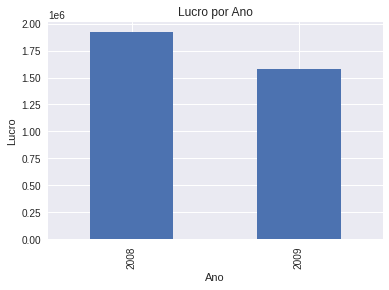

In [38]:
#Gráfico de barras de lucro por ano
aux2 = df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()
aux2.plot.bar(title="Lucro por Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro");

In [39]:
#Novo df com dados de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]


In [40]:
df_2009.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


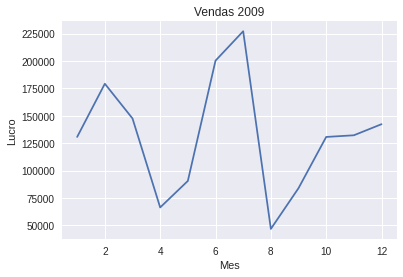

In [43]:
#Lucro por mes 2009
df_2009.groupby(df["Data Venda"].dt.month)["Lucro"].sum().plot(title="Vendas 2009")
plt.xlabel("Mes")
plt.ylabel("Lucro");

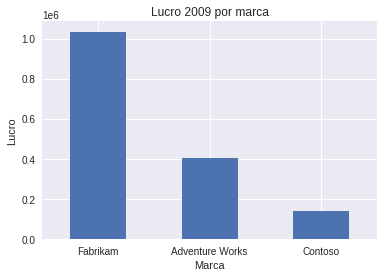

In [45]:
#Lucro por marca 2009
df_2009.groupby("Marca")["Lucro"].sum().sort_values(ascending=False).plot.bar(title="Lucro 2009 por marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

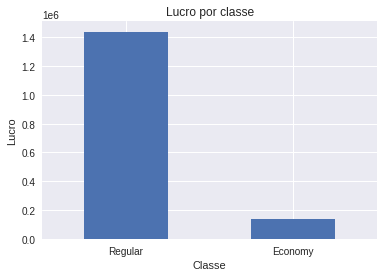

In [46]:
#Lucro por classe
df_2009.groupby("Classe")["Lucro"].sum().sort_values(ascending=False).plot.bar(title="Lucro por classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [47]:
#dados estatisticos de uma coluna
df_2009["Tempo Envio"].describe()

count                 435.00
mean                    8.77
std                     2.98
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    13.00
Name: Tempo Envio, dtype: float64

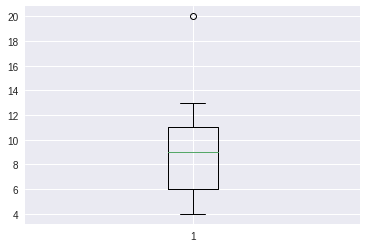

In [50]:
plt.boxplot(df["Tempo Envio"]);

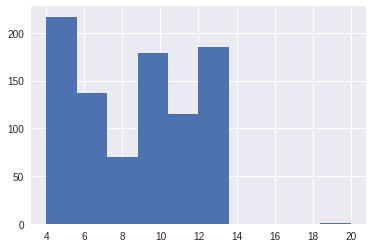

In [51]:
#Histograma
plt.hist(df["Tempo Envio"]);

In [52]:
#Usando min para investigar outlier
df["Tempo Envio"].min()

4

In [53]:
#Usando max para investigar outlier
df["Tempo Envio"].max()

20

In [54]:
#Conferindo o outlier
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [55]:
df.to_csv("df_vendas_novo.csv", index=False)